In [2]:
!pip install h5netcdf

In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import Image
import scipy.io
import pandas as pd
from IPython.display import display, clear_output
import sys, os
import warnings
import h5py

warnings.filterwarnings('ignore')

from sklearn.mixture import GaussianMixture
from scipy import linalg
import itertools
import seaborn as sns


from sklearn.cluster import SpectralClustering, AffinityPropagation



%matplotlib inline

from aidapy import load_data
import aidapy.aidaxr

In [2]:
from h5utils import h5tovts

In [15]:
# start_time = datetime(2015, 10, 16, 13, 7, 0);
# end_time   = datetime(2015, 10, 16, 13, 9, 0);
# start_time = datetime(2017, 7, 3, 5, 26, 50)
# end_time   = datetime(2017, 7, 3, 5, 26, 51,2)
start_time = datetime(2015, 10, 16, 13, 7, 0);
end_time   = datetime(2015, 10, 16, 13, 8, 0);
# start_time = datetime(2015, 9, 19, 7, 42,19 )
# end_time   = datetime(2015, 9, 19, 7, 55, 41)
# start_time = datetime(2017, 5, 27, 7, 42, 20)
# end_time   = datetime(2017, 5, 27, 7, 44, 40)
starttime=[start_time.year,start_time.month, start_time.day, start_time.hour, start_time.minute]

# start_time_sub = datetime(start_time.year, start_time.month, start_time.day, 13, 7, 2, 100000);
# end_time_sub   = datetime(start_time.year, start_time.month, start_time.day, 13, 7, 5, 130000);
# start_time_sub = datetime(start_time.year, start_time.month, start_time.day, start_time.hour,43, 35,250000)
# end_time_sub   = datetime(start_time.year, start_time.month, start_time.day, start_time.hour, 43, 35, 280000)
                        
probes= ['3']
probes2= 3

In [5]:
starttime

[2015, 10, 16, 13, 7]

In [18]:
settings = {'prod': ['i_dist', 'e_dist', 'dc_mag', 'sc_att', 'i_bulkv'],
            'probes': ['3'], 'coords': 'gse', 'mode': 'high_res', 'frame':'gse'};
species      = 'electron'
frame        = 'B'
grid_geom     = 'cart'
v_max        = 1.2e7
resolution   = 25
interp_schem = 'lin'
xr_mms = load_data(mission='mms', start_time=start_time, end_time=end_time, **settings);

In [13]:
xr_mms

<xarray.Dataset>
Dimensions:                   (mms1_des_energy_brst: 32, mms1_des_phi_brst: 32, mms1_des_theta_brst: 16, mms1_dis_bulkv_gse_brst: 3, mms1_dis_energy_brst: 32, mms1_dis_phi_brst: 32, mms1_dis_theta_brst: 16, mms1_fgm_b_gse_brst_l2: 4, mms1_mec_quat_eci_to_gse: 4, time1: 292, time2: 1465, time3: 5614, time4: 5, time5: 292)
Coordinates:
  * time1                     (time1) datetime64[ns] 2015-10-16T13:07:00.1352...
  * mms1_dis_energy_brst      (mms1_dis_energy_brst) float32 12.06 ... 2.83e+04
  * mms1_dis_theta_brst       (mms1_dis_theta_brst) float32 5.625 ... 174.4
  * mms1_dis_phi_brst         (mms1_dis_phi_brst) float32 9.812 21.06 ... 358.6
  * time2                     (time2) datetime64[ns] 2015-10-16T13:07:00.0152...
  * mms1_des_energy_brst      (mms1_des_energy_brst) float32 12.41 ... 2.759e+04
  * mms1_des_theta_brst       (mms1_des_theta_brst) float32 5.625 ... 174.4
  * mms1_des_phi_brst         (mms1_des_phi_brst) float32 6.5 17.75 ... 355.2
  * time3                     (time3) datetime64[ns] 2015-10-16T13:07:00.0061...
  * mms1_fgm_b_gse_brst_l2    (mms1_fgm_b_gse_brst_l2) <U3 'x' 'y' 'z' 'tot'
  * time4                     (time4) datetime64[ns] 2015-10-16T13:07:00 ... ...
  * mms1_mec_quat_eci_to_gse  (mms1_mec_quat_eci_to_gse) <U3 'x' 'y' 'z' 'tot'
  * time5                     (time5) datetime64[ns] 2015-10-16T13:07:00.1352...
  * mms1_dis_bulkv_gse_brst   (mms1_dis_bulkv_gse_brst) <U1 'x' 'y' 'z'
Data variables:
    i_dist1                   (time1, mms1_dis_energy_brst, mms1_dis_theta_brst, mms1_dis_phi_brst) float32 ...
    e_dist1                   (time2, mms1_des_energy_brst, mms1_des_theta_brst, mms1_des_phi_brst) float32 ...
    dc_mag1                   (time3, mms1_fgm_b_gse_brst_l2) float32 13.41 ....
    sc_att1                   (time4, mms1_mec_quat_eci_to_gse) float64 -0.03...
    i_bulkv1                  (time5, mms1_dis_bulkv_gse_brst) float32 -224.1...
Attributes:
    mission:        mms
    load_settings:  {'prod': ['i_dist', 'e_dist', 'dc_mag', 'sc_att', 'i_bulk...

In [14]:
xr_mms = xr_mms.vdf.interpolate(start_time, end_time, start_time_sub, end_time_sub,
                        species=species, frame=frame, grid_geom=grid_geom,
                        v_max=v_max, resolution=resolution, interp_schem=interp_schem);
vdf=xr_mms['vdf_interp'].values;
#f = h5py.File('C:/Users/natha/aidapy/vdfstorage/vdf'+str(starttime)+'.hdf5','w')
# group = f.create_group('b_group')
#f.create_dataset('vdf'+str(starttime),data=vdf)
#f.close()



.____________________________________________________________
| mms_vdf.py, aidapy.
|
| Product(s):
|   - i_dist
|   - e_dist
|   - dc_mag
|   - sc_att
|   - i_bulkv
| Grid geometry:    cart
| Resolution:       25
| Interpolation:    lin
| Start time:       2015-10-16T13:07:02.115313000
| Stop time :       2015-10-16T13:07:05.145334000
| Ind. start-stop:  70-171
| Nb distributions: 101
|____________________________________________________________


170/1465 (current VDF/nb total VDFs)
Total runtime: 0 s.



In [8]:
xr_mms['grid_interp_cart'].shape

(3, 25, 25, 25)

vxv -2280.197 2280.197
vyv -2280.1968 2280.1968
vzv -2288.0552 2288.0552


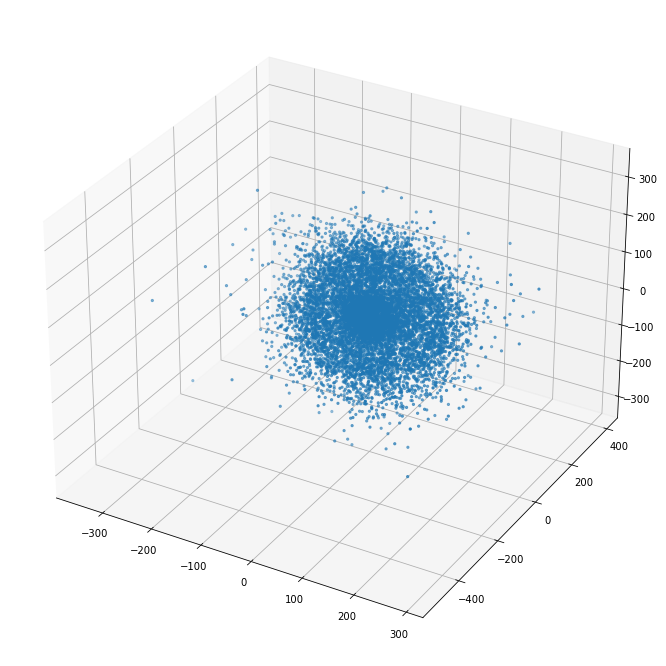

In [23]:
#these 4 lines are only to save time when you change probe from aidapy 

phistr='mms{}_des_phi_brst'.format(probes2)
thetastr='mms{}_des_theta_brst'.format(probes2)
energystr='mms{}_des_energy_brst'.format(probes2)
fpistr='e_dist{}'.format(probes2)

#so you convert from th-ph-enrg to vx-vy-vz and interpolate over a rectangular grid

vmax = 560
mi = 1.67e-27
e = 0.5*mi*(vmax*1e3)**2
e = e/(1.6e-19)

phi=np.array(xr_mms[phistr]/360*2*np.pi)
theta=np.array(xr_mms[thetastr]/360*2*np.pi)
energy=np.array(xr_mms[energystr])

v =np.sqrt(2/mi*energy*(1.6e-19)) *1e-3
fpi=np.array(xr_mms[fpistr])

fiv, thv, vv = np.meshgrid(phi, theta, v,  indexing='ij')
vxv = vv * np.cos (fiv) * np.sin (thv)
vyv = vv * np.sin (fiv) * np.sin (thv)
vzv = vv * np.cos (thv)

print('vxv',np.min(vxv),np.max(vxv))
print('vyv',np.min(vyv),np.max(vyv))
print('vzv',np.min(vzv),np.max(vzv))

points=np.column_stack((vxv.ravel(), vyv.ravel(), vzv.ravel()))
vx = np.linspace(-vmax, vmax, 100)

grid_x, grid_y, grid_z= np.meshgrid(vx,vx,vx, indexing='ij')

fpi1=fpi[50,:].ravel()
z = scipy.interpolate.griddata(points, fpi1, (grid_x, grid_y, grid_z), method='linear')
vdf=z
nx,ny,nz=vdf.shape

vmax=560
dv= 2*vmax/(nx-1)
v1D= np.arange(-vmax,vmax+dv,dv)
vvx,vvy,vvz= np.meshgrid(v1D,v1D,v1D)
Np=10000
vvx.shape, vdf.shape

f1D=vdf.flatten()
fmin= min([i for i in f1D if i>0])

f1D= np.where(f1D==0, fmin/1000, f1D)

vx1D=(np.conjugate(vvx).T).flatten()
vy1D=(np.conjugate(vvy).T).flatten()
vz1D=(np.conjugate(vvz).T).flatten()

Ng=f1D.shape[0]
ranarr=np.random.rand(4,Np)
fcum=np.cumsum(f1D);

fcum=Ng*fcum/fcum[Ng-1]

NgRange=np.arange(1,Ng+1)

Pg=np.interp(Ng*ranarr[0,:], fcum.T, NgRange)
Pg= 1 + np.floor(Pg)
Pg=Pg.astype(int)

xp=vx1D[Pg] + dv*ranarr[1,:] - dv/2
yp=vy1D[Pg] + dv*ranarr[2,:] - dv/2
zp=vz1D[Pg] + dv*ranarr[3,:] - dv/2

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

scat=ax.scatter(xp,yp,zp, marker='.')

fcmdata=np.array([xp,yp,zp])
fcmdata=np.conjugate(fcmdata).T


In [132]:
xr_mms['grid_interp_cart'].shape

(3, 100, 100, 100)

TypeError: Dimensions of C (100, 100) are incompatible with X (26) and/or Y (26); see help(pcolormesh)

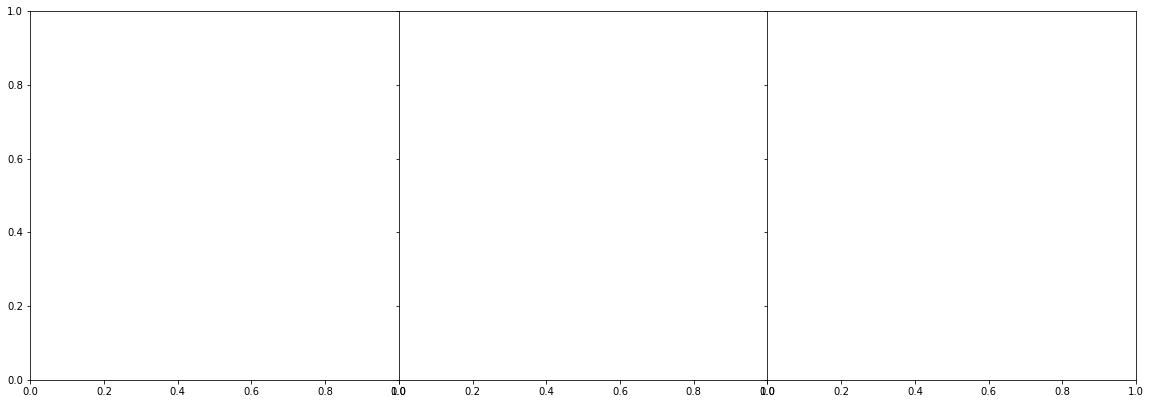

In [14]:
resolution = vdf.shape[0]
cmap='RdBu_r'
ind_mid = int(resolution/2.)
centers_x = xr_mms['grid_interp_cart'][0, :, 0, 0]
dX = centers_x[1]-centers_x[0]
edges_x = centers_x-.5*dX
edges_x = np.append(edges_x, edges_x[-1]+dX)
x = centers_x
y = centers_x

a0 = np.log10(vdf[:, :, ind_mid])
a1 = np.log10(vdf[:, ind_mid, :])
a2 = np.log10(vdf[ind_mid, :, :])

vlima = max(np.nanmax(a0), np.nanmax(a1), np.nanmax(a2))

fig, AX = plt.subplots(1, 3, figsize=(16, 8), sharex=True, sharey=True)
plt.subplots_adjust(top=.99, bottom=.03, left=.03, right=.99,
                        wspace=0., hspace=0.)
for ax in AX.flatten():
    ax.set_aspect('equal')
    
m0 = AX[0].pcolormesh(edges_x, edges_x, a0.T,
                              vmax=vlima, #vmin=-vlima,
                              cmap=cmap, rasterized=True)
                              # vmax=vlim,
                          # vmin=-16.5,vmax=-11.8,
AX[1].pcolormesh(edges_x, edges_x, a1.T,
                         vmax=vlima, #vmin=-vlima,
                         cmap=cmap, rasterized=True)
                         # vmax=vlim,
                         # vmin=-16.5,vmax=-11.8,
AX[2].pcolormesh(edges_x, edges_x, a2.T,
                         vmax=vlima, #vmin=-vlima,
                         cmap=cmap, rasterized=True)
                         # vmax=vlim,
                         # vmin=-16.5,vmax=-11.8,


AX[0].contour(x, y, a0.T, levels=40, colors='k', linewidths=.5)
AX[1].contour(x, y, a1.T, levels=40, colors='k', linewidths=.5)
AX[2].contour(x, y, a2.T, levels=40, colors='k', linewidths=.5)

posAx = AX[1].get_position()
cax = fig.add_axes([posAx.x0*1.1, posAx.y0*.55, .2, 0.015])
cb = fig.colorbar(m0, cax=cax, orientation='horizontal')
cb.set_label('VDF (s^3/m^6)')
AX[0].set_title('v_x, v_y')
AX[1].set_title('v_x, v_z')
AX[2].set_title('v_y, v_z')

fig.suptitle('Cartesian coordinate system, cuts')   
plt.show()   

In [6]:
resolution = vdf.shape[0]
cmap='RdBu_r'
ind_mid = int(resolution/2.)
centers_x = [grid_x, grid_y, grid_z][:, 0, 0]
dX = centers_x[1]-centers_x[0]
edges_x = centers_x-.5*dX
edges_x = np.append(edges_x, edges_x[-1]+dX)
x = centers_x
y = centers_x

a0 = np.log10(vdf[:, :, ind_mid])
a1 = np.log10(vdf[:, ind_mid, :])
a2 = np.log10(vdf[ind_mid, :, :])

vlima = max(np.nanmax(a0), np.nanmax(a1), np.nanmax(a2))

fig, AX = plt.subplots(1, 3, figsize=(16, 8), sharex=True, sharey=True)
plt.subplots_adjust(top=.99, bottom=.03, left=.03, right=.99,
                        wspace=0., hspace=0.)
for ax in AX.flatten():
    ax.set_aspect('equal')
    
m0 = AX[0].pcolormesh(edges_x, edges_x, a0.T,
                              vmax=vlima, #vmin=-vlima,
                              cmap=cmap, rasterized=True)
                              # vmax=vlim,
                          # vmin=-16.5,vmax=-11.8,
AX[1].pcolormesh(edges_x, edges_x, a1.T,
                         vmax=vlima, #vmin=-vlima,
                         cmap=cmap, rasterized=True)
                         # vmax=vlim,
                         # vmin=-16.5,vmax=-11.8,
AX[2].pcolormesh(edges_x, edges_x, a2.T,
                         vmax=vlima, #vmin=-vlima,
                         cmap=cmap, rasterized=True)
                         # vmax=vlim,
                         # vmin=-16.5,vmax=-11.8,


AX[0].contour(x, y, a0.T, levels=40, colors='k', linewidths=.5)
AX[1].contour(x, y, a1.T, levels=40, colors='k', linewidths=.5)
AX[2].contour(x, y, a2.T, levels=40, colors='k', linewidths=.5)

posAx = AX[1].get_position()
cax = fig.add_axes([posAx.x0*1.1, posAx.y0*.55, .2, 0.015])
cb = fig.colorbar(m0, cax=cax, orientation='horizontal')
cb.set_label('VDF (s^3/m^6)')
AX[0].set_title('v_x, v_y')
AX[1].set_title('v_x, v_z')
AX[2].set_title('v_y, v_z')

fig.suptitle('Cartesian coordinate system, cuts')   
plt.show()   

TypeError: list indices must be integers or slices, not tuple

K-means

Text(0, 0.5, 'Calinski-Harabasz-score')

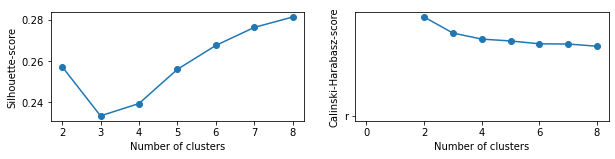

In [37]:
fig.clear()
import sklearn
Sil_Score=[]
CH_score=[]
clusters=list(range(2,9))
from sklearn.cluster import KMeans
for i in range(2,9):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(fcmdata)
    Sil_Score.append(sklearn.metrics.silhouette_score(fcmdata,kmeans.labels_))
    CH_score.append(sklearn.metrics.calinski_harabasz_score(fcmdata,kmeans.labels_))
plt.rcParams['figure.figsize'] = [10, 2]    
  
plt.subplot(1, 2, 1)
plt.plot(clusters,Sil_Score,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette-score')


plt.subplot(1, 2, 2) # index 2

plt.plot(clusters,CH_score,'-o','r')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz-score')


In [79]:
from scipy.spatial.distance import pdist, squareform
def getAffinityMatrix(coordinates, k = 40):
    """
    Calculate affinity matrix based on input coordinates matrix and the numeber
    of nearest neighbours.
    
    Apply local scaling based on the k nearest neighbour
        References:
    https://papers.nips.cc/paper/2619-self-tuning-spectral-clustering.pdf
    """
    # calculate euclidian distance matrix
    dists = squareform(pdist(coordinates)) 
    
    # for each row, sort the distances ascendingly and take the index of the 
    #k-th position (nearest neighbour)
    knn_distances = np.sort(dists, axis=0)[k]
    knn_distances = knn_distances[np.newaxis].T
    
    # calculate sigma_i * sigma_j
    local_scale = knn_distances.dot(knn_distances.T)

    affinity_matrix = dists * dists
    affinity_matrix = -affinity_matrix / local_scale
    # divide square distance matrix by local scale
    affinity_matrix[np.where(np.isnan(affinity_matrix))] = 0.0
    # apply exponential
    affinity_matrix = np.exp(affinity_matrix)
    np.fill_diagonal(affinity_matrix, 0)
    return affinity_matrix

In [ ]:
affinity_matrix = getAffinityMatrix(fcmdata, k = 40)

In [ ]:
import scipy
from scipy.sparse import csgraph
# from scipy.sparse.linalg import eigsh
from numpy import linalg as LA
def eigenDecomposition(A, plot = True, topK = 5):
    """
    :param A: Affinity matrix
    :param plot: plots the sorted eigen values for visual inspection
    :return A tuple containing:
    - the optimal number of clusters by eigengap heuristic
    - all eigen values
    - all eigen vectors
    
    This method performs the eigen decomposition on a given affinity matrix,
    following the steps recommended in the paper:
    1. Construct the normalized affinity matrix: L = D−1/2ADˆ −1/2.
    2. Find the eigenvalues and their associated eigen vectors
    3. Identify the maximum gap which corresponds to the number of clusters
    by eigengap heuristic
    
    References:
    https://papers.nips.cc/paper/2619-self-tuning-spectral-clustering.pdf
    http://www.kyb.mpg.de/fileadmin/user_upload/files/publications/attachments/Luxburg07_tutorial_4488%5b0%5d.pdf
    """
    L = csgraph.laplacian(A, normed=True)
    n_components = A.shape[0]
    
    # LM parameter : Eigenvalues with largest magnitude (eigs, eigsh), that is, largest eigenvalues in 
    # the euclidean norm of complex numbers.
#     eigenvalues, eigenvectors = eigsh(L, k=n_components, which="LM", sigma=1.0, maxiter=5000)
    eigenvalues, eigenvectors = LA.eig(L)
    
    if plot:
        plt.title('Largest eigen values of input matrix')
        plt.scatter(np.arange(len(eigenvalues)), eigenvalues)
        plt.grid()
        
    # Identify the optimal number of clusters as the index corresponding
    # to the larger gap between eigen values
    index_largest_gap = np.argsort(np.diff(eigenvalues))[::-1][:topK]
    nb_clusters = index_largest_gap + 1
        
    return nb_clusters, eigenvalues, eigenvectors
k, _,  _ = eigenDecomposition(affinity_matrix)
print(k)

In [ ]:
k, _,  _ = eigenDecomposition(affinity_matrix)
print(k)

Fuzzy C-means

In [8]:
fig.clear()
from fcmeans import FCM
n_clusters=4
fcmdata=np.array([xp,yp,zp])
fcmdata=np.conjugate(fcmdata).T
my_model = FCM(n_clusters=n_clusters)
my_model.fit(fcmdata)

fcm_labels = my_model.predict(fcmdata)
fcm_centers = my_model.centers 

In [328]:
!pip install gif
import gif

  Created wheel for gif: filename=gif-3.0.0-py3-none-any.whl size=4818 sha256=41b855218a4d5cb03ae48ba23cfea52dda7887d8b84d92779f3b220fc54af1e2
  Stored in directory: c:\users\natha\appdata\local\pip\cache\wheels\84\95\52\fd8ad29725d2c9e21ca1a4c24b917bfed46cc851fdac171b7f
Successfully built gif


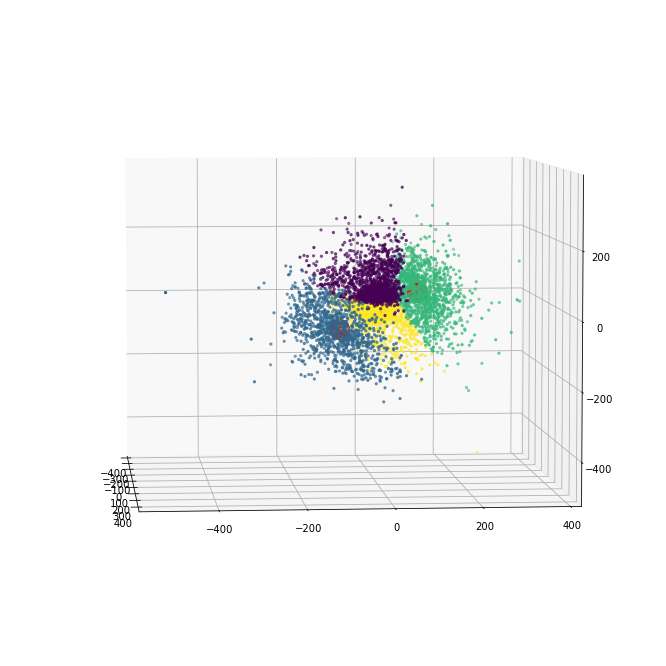

In [9]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(xp,yp,zp,marker='.', c=fcm_labels)
for i in range(0,n_clusters):
    ax.plot(fcm_centers[i,0],fcm_centers[i,1],fcm_centers[i,2],'o', color='red',markersize='20')

for angle in range(0, 360, 5):
    ax.view_init(5, angle)
    display(fig)
    clear_output(wait = True)
    plt.pause(0.1)


Spectral clustering

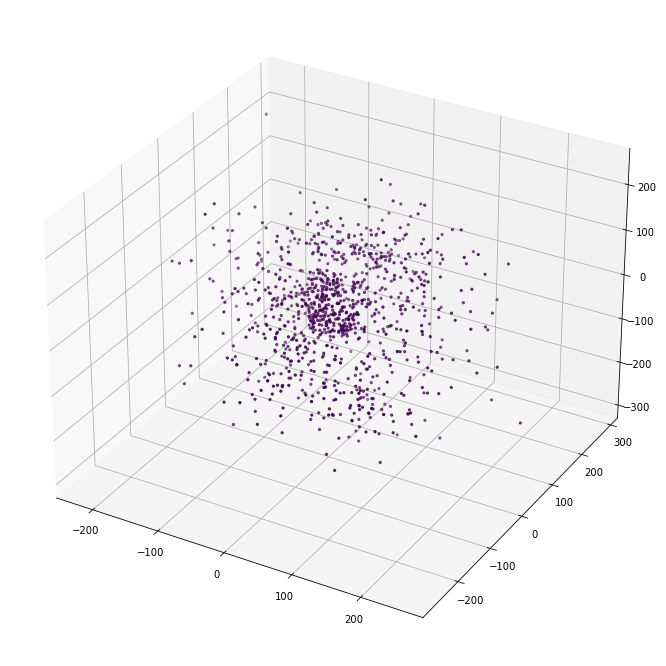

In [12]:
fig.clear()
from sklearn.cluster import SpectralClustering




clustering = SpectralClustering(n_clusters=5,
         assign_labels='kmeans',
        random_state=0).fit(fcmdata)
clustering.labels_



fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(xp,yp,zp,marker='.', c=clustering.labels_)

# for angle in range(0, 360, 5):
#     ax.view_init(5, angle)
#     display(fig)
#     clear_output(wait = True)
#     plt.pause(0.1)


GMM

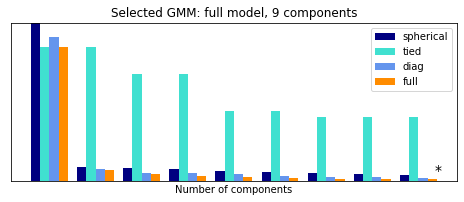

In [14]:
fig.clear()

lowest_aic = np.infty
aic= []
n_components_range= range(1,10)
cv_types = ["spherical","tied","diag","full"]

for cv_type in cv_types:
    for n_components in n_components_range:
    
        gmm = GaussianMixture(n_components,covariance_type=cv_type, random_state=0).fit(fcmdata)
#         gmm_labels=gmm.predict(fcmdata)
        aic.append(gmm.aic(fcmdata))
        if aic[-1] < lowest_aic:
                lowest_aic = aic[-1]
                best_gmm = gmm
aic = np.array(aic)
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            aic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([aic.min() * 1.01 - 0.01 * aic.max(), aic.max()])
plt.title("AIC score per model")
xpos = (
    np.mod(aic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(aic.argmin() / len(n_components_range))
)
plt.text(xpos, aic.min() * 0.97 + 0.03 * aic.max(), "*", fontsize=14)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
# splot = plt.subplot(2, 1, 2)
# Y_ = clf.predict(fcmdata)
# for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_, color_iter)):
#     v, w = linalg.eigh(cov)
#     if not np.any(Y_ == i):
#         continue
#     plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

#     # Plot an ellipse to show the Gaussian component
#     angle = np.arctan2(w[0][1], w[0][0])
#     angle = 180.0 * angle / np.pi  # convert to degrees
#     v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
#     ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
#     ell.set_clip_box(splot.bbox)
#     ell.set_alpha(0.5)
#     splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title(
    f"Selected GMM: {best_gmm.covariance_type} model, "
    f"{best_gmm.n_components} components"
)
plt.subplots_adjust(hspace=0.35, bottom=0.02)
plt.show()

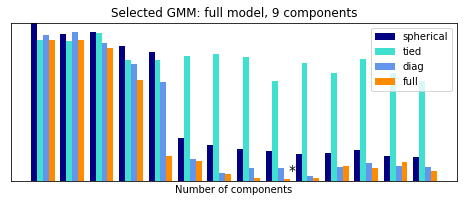

In [21]:
fig.clear()

lowest_bic = np.infty
bic= []
n_components_range= range(1,15)
cv_types = ["spherical","tied","diag","full"]

for cv_type in cv_types:
    for n_components in n_components_range:
    
        gmm = GaussianMixture(n_components,covariance_type=cv_type, random_state=0).fit(fcmdata)
#         gmm_labels=gmm.predict(fcmdata)
        bic.append(gmm.bic(fcmdata))
        if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
bic = np.array(bic)
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
# splot = plt.subplot(2, 1, 2)
# Y_ = clf.predict(fcmdata)
# for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_, color_iter)):
#     v, w = linalg.eigh(cov)
#     if not np.any(Y_ == i):
#         continue
#     plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

#     # Plot an ellipse to show the Gaussian component
#     angle = np.arctan2(w[0][1], w[0][0])
#     angle = 180.0 * angle / np.pi  # convert to degrees
#     v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
#     ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
#     ell.set_clip_box(splot.bbox)
#     ell.set_alpha(0.5)
#     splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title(
    f"Selected GMM: {best_gmm.covariance_type} model, "
    f"{best_gmm.n_components} components"
)
plt.subplots_adjust(hspace=0.35, bottom=0.02)
plt.show()

In [22]:
fig.clear()

my_model = FCM(n_clusters=best_gmm.n_components)
my_model.fit(fcmdata)

fcm_labels = my_model.predict(fcmdata)
fcm_centers = my_model.centers
fcm_labels.shape

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(xp,yp,zp,marker='.', c=fcm_labels)


for i in range(0,n_clusters):
    ax.plot(fcm_centers[i,0],fcm_centers[i,1],fcm_centers[i,2],'o', color='red',markersize='20')
    
for angle in range(0, 360, 5):
     ax.view_init(10, angle)
     display(fig)
     clear_output(wait = True)
     plt.pause(0.1)

NameError: name 'FCM' is not defined

DBSCAN

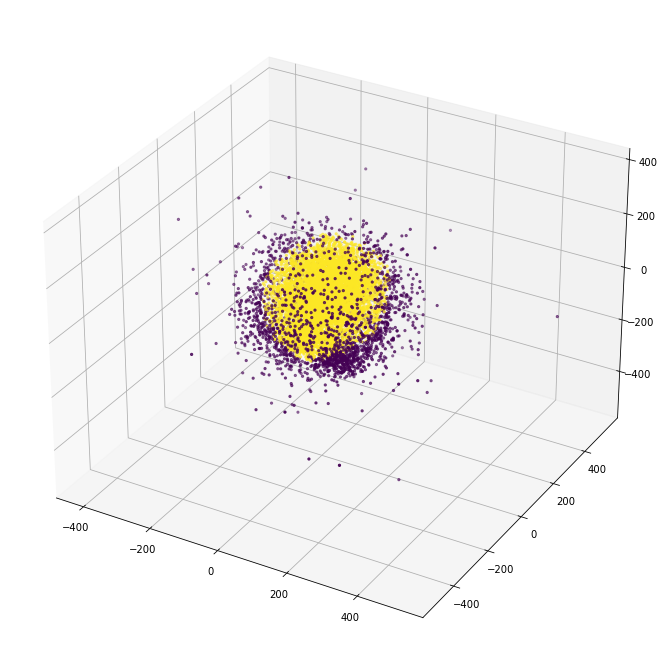

In [53]:
fig.clear()
from sklearn.cluster import DBSCAN
DBcluster = DBSCAN(eps=70, min_samples=500).fit(fcmdata)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(xp,yp,zp,marker='.', c=DBcluster.labels_)



In [112]:
fig.clear()
from sklearn.cluster import DBSCAN
Sil_Score=[]
CH_score=[]
clusters=list(range(2,9))

for i in range(2,9):
    DBcluster = DBSCAN(eps=0.5, min_samples=).fit(fcmdata)
    Sil_Score.append(sklearn.metrics.silhouette_score(fcmdata,kmeans.labels_))
    CH_score.append(sklearn.metrics.calinski_harabasz_score(fcmdata,kmeans.labels_))
plt.rcParams['figure.figsize'] = [10, 2]    
  
plt.subplot(1, 2, 1)
plt.plot(clusters,Sil_Score,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette-score')


plt.subplot(1, 2, 2) # index 2

plt.plot(clusters,CH_score,'-o','r')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz-score')

SyntaxError: invalid syntax (<ipython-input-112-0fae72e06459>, line 8)

In [113]:
import hdbscan

ModuleNotFoundError: No module named 'hdbscan'

0
1.0
1
-0.016526412374222928
2
0.0009957203700964293
3
0.00393493038309688
4
0.0036333858918064996
5
-0.004198824048951946
6
-0.0008977563382492637
7
0.000728432916467901
8
-1.2399467406813843e-05
9
-1.9064055356261552e-05
10
1.3625140379734385e-05
11
-8.2875517976601e-06
12
-1.4429017838600565e-06
13
1.0508529262160488e-06
14
2.393120694799752e-07
15
-5.69756103807542e-10
16
-6.341366532978941e-08
17
-1.4188986275786522e-08
18
1.147908408527212e-08
19
2.125374694873929e-09
20
-1.3875637331958247e-09
21
-1.863713883301362e-10
22
1.1867779276888156e-10
23
1.1297400813476256e-11
24
-7.205156944010807e-12
25
-4.818296502522367e-13
26
2.738761604513008e-13
27
1.3995689900090198e-14
28
-8.487288808765499e-16
29
-3.859897807626069e-16
30
-7.888075736040389e-16
31
3.73795891884755e-17
32
6.901280625354567e-17
33
-4.73046319613041e-18
34
-3.4293916391217735e-18
35
4.306265487618695e-19
36
8.76851188854338e-20
37
-2.987499186788997e-20
38
2.2593427721568977e-21
39
1.6840572189488207e-21
40
-4.

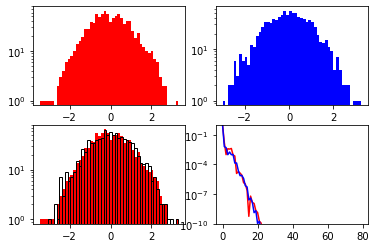

In [18]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

Np =1000
Nh=80
vp=np.random.randn(Np,1)
vect=np.zeros(Nh)
m=np.arange(0,Nh,1)
for i in range(0,Nh):
    print(i)
    c=np.zeros(i)
    c=np.hstack((c,[1]))
    hv=np.polynomial.hermite.hermval(vp/np.sqrt(2),c)
    vect[i]=np.mean(hv)/mt.factorial(i+1)
    print(vect[i])

vt=np.sqrt(2)
k=90
nu=2*k-1
sig=np.sqrt(k*vt*vt/nu)
vpk=np.sqrt(nu*(pow(np.random.rand(Np,1),-2/nu) -1.0));
vpk=sig*vpk*np.cos(2*np.pi*np.random.rand(Np,1));
vectk=np.zeros(Nh)
for i in range(0,Nh):
    print(i)
    c=np.zeros(i)
    c=np.hstack((c,[1]))
    hv=np.polynomial.hermite.hermval(vpk/np.sqrt(2),c)
    vectk[i]=np.mean(hv)/mt.factorial(i+1)
    print(vectk[i])
    
ax= plt.subplot(2,2,1)
n, bins, patches = plt.hist(vp, 50, log=True, color='r')

plt.subplot(2,2,2)
n, bins, patches = plt.hist(vpk, 50, log=True, color='b')

plt.subplot(2,2,3)
n, bins, patches = plt.hist(vp, 50, log=True, color='r')
n, bins, patches = plt.hist(vpk, bins=bins, log=True, color='b',fill=False)
plt.subplot(2,2,4)
plt.semilogy(m,np.abs(vect),'r',m,np.abs(vectk),'b')
plt.ylim((pow(10,-10),pow(10,0)))
plt.show()

(60000, 3)


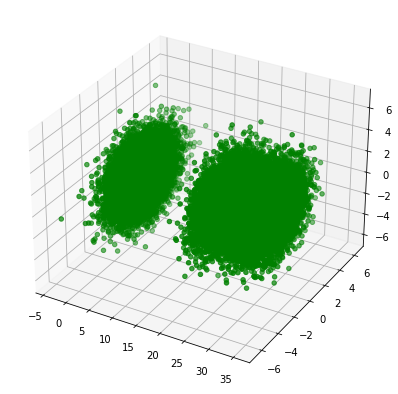

In [5]:
Np=10000
k_kappa=20
NC=6
v0x=30*np.random.rand(NC)
v0y=np.zeros(NC)
v0z=np.zeros(NC)
vpkx=[]
vpky=[]
vpkz=[]
for ncomp in range(0,NC):
    uth=np.sqrt(2)
    vth=uth
    apar = uth*uth*2.0*(k_kappa-1.5)/k_kappa
    aperp = vth*vth*2.0*(k_kappa-1.5)/k_kappa
    theta = 2.0 * np.pi * np.random.rand(Np)
    vpar=np.sqrt(k_kappa*apar*(pow(np.random.rand(Np),(-1.0/(k_kappa-0.5)))-1.0))*np.cos(theta)
    vperp=np.sqrt(k_kappa*aperp*(1.0+vpar*vpar/(k_kappa*apar+1e-10))*(pow((1.0-np.random.rand(Np)),(-1.0/k_kappa))-1.0))

    theta = 2*np.pi*np.random.rand(Np)
    vpkx2=v0x[ncomp]+vpar
    vpky2=vperp * np.cos(theta)
    vpkz2=vperp * np.sin(theta)
    
    vpkx.append(vpkx2)
    vpky.append(vpky2)
    vpkz.append(vpkz2)
    
    

vpkx = list(np.concatenate(vpkx). flat)
vpky = list(np.concatenate(vpky). flat)
vpkz = list(np.concatenate(vpkz). flat)   
Xdata=np.array([vpkx,vpky,vpkz])

Xdata=np.conjugate(Xdata).T  
print(Xdata.shape)
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(Xdata[:,0], Xdata[:,1], Xdata[:,2], color = "green")

 
# show plot
plt.show()


In [147]:
v0x=30*np.random.rand(NC)
v0x[0]
v0y=np.zeros(4)
v0y[1]

0.0

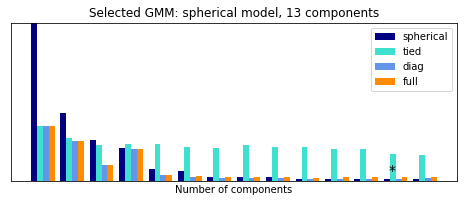

In [3]:
fig.clear()

lowest_bic = np.infty
bic= []
n_components_range= range(1,15)
cv_types = ["spherical","tied","diag","full"]

for cv_type in cv_types:
    for n_components in n_components_range:
    
        gmm = GaussianMixture(n_components,covariance_type=cv_type, random_state=0).fit(Xdata)
#         gmm_labels=gmm.predict(fcmdata)
        bic.append(gmm.bic(Xdata))
        if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
bic = np.array(bic)
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
# splot = plt.subplot(2, 1, 2)
# Y_ = clf.predict(fcmdata)
# for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_, color_iter)):
#     v, w = linalg.eigh(cov)
#     if not np.any(Y_ == i):
#         continue
#     plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

#     # Plot an ellipse to show the Gaussian component
#     angle = np.arctan2(w[0][1], w[0][0])
#     angle = 180.0 * angle / np.pi  # convert to degrees
#     v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
#     ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
#     ell.set_clip_box(splot.bbox)
#     ell.set_alpha(0.5)
#     splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title(
    f"Selected GMM: {best_gmm.covariance_type} model, "
    f"{best_gmm.n_components} components"
)
plt.subplots_adjust(hspace=0.35, bottom=0.02)
plt.show()

In [77]:
import scipy
from scipy.sparse import csgraph
# from scipy.sparse.linalg import eigsh
from numpy import linalg as LA
def eigenDecomposition(A, plot = True, topK = 10):
    """
    :param A: Affinity matrix
    :param plot: plots the sorted eigen values for visual inspection
    :return A tuple containing:
    - the optimal number of clusters by eigengap heuristic
    - all eigen values
    - all eigen vectors
    
    This method performs the eigen decomposition on a given affinity matrix,
    following the steps recommended in the paper:
    1. Construct the normalized affinity matrix: L = D−1/2ADˆ −1/2.
    2. Find the eigenvalues and their associated eigen vectors
    3. Identify the maximum gap which corresponds to the number of clusters
    by eigengap heuristic
    
    References:
    https://papers.nips.cc/paper/2619-self-tuning-spectral-clustering.pdf
    http://www.kyb.mpg.de/fileadmin/user_upload/files/publications/attachments/Luxburg07_tutorial_4488%5b0%5d.pdf
    """
    L = csgraph.laplacian(A, normed=True)
    n_components = A.shape[0]
    
    # LM parameter : Eigenvalues with largest magnitude (eigs, eigsh), that is, largest eigenvalues in 
    # the euclidean norm of complex numbers.
#     eigenvalues, eigenvectors = eigsh(L, k=n_components, which="LM", sigma=1.0, maxiter=5000)
    eigenvalues, eigenvectors = LA.eig(L)
    
    if plot:
        plt.title('Largest eigen values of input matrix')
        plt.scatter(np.arange(len(eigenvalues)), eigenvalues)
        plt.grid()
        
    # Identify the optimal number of clusters as the index corresponding
    # to the larger gap between eigen values
    index_largest_gap = np.argsort(np.diff(eigenvalues))[::-1][:topK]
    nb_clusters = index_largest_gap + 1
        
    return nb_clusters, eigenvalues, eigenvectors

In [82]:
affinity_matrix = getAffinityMatrix(Xdata, k = 40)

[580 685 727 767 812 828 841 881 895 906]


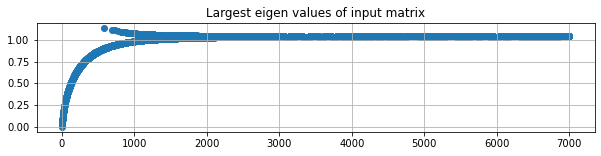

In [81]:
k, E,  _ = eigenDecomposition(affinity_matrix)
print(k)

In [4]:
fig.clear()
from sklearn.cluster import SpectralClustering

Sil_Score=[]
CH_score=[]
clusters=list(range(2,10))

for i in range(2,10):
    clustering = SpectralClustering(n_clusters=i,
         assign_labels='discretize', 
        random_state=0).fit(Xdata)
    Sil_Score.append(sklearn.metrics.silhouette_score(Xdata,clustering.labels_))
    CH_score.append(sklearn.metrics.calinski_harabasz_score(Xdata,clustering.labels_))
plt.rcParams['figure.figsize'] = [10, 2]    
  
plt.subplot(1, 2, 1)
plt.plot(clusters,Sil_Score,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette-score')


plt.subplot(1, 2, 2) # index 2

plt.plot(clusters,CH_score,'-o','r')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz-score')

NameError: name 'sklearn' is not defined

In [ ]:

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(vpkx,vpky,vpkz,marker='.', c=clustering.labels_)


# for angle in range(0, 360, 5):
#     ax.view_init(5, angle)
#     display(fig)
#     clear_output(wait = True)
#     plt.pause(0.1)

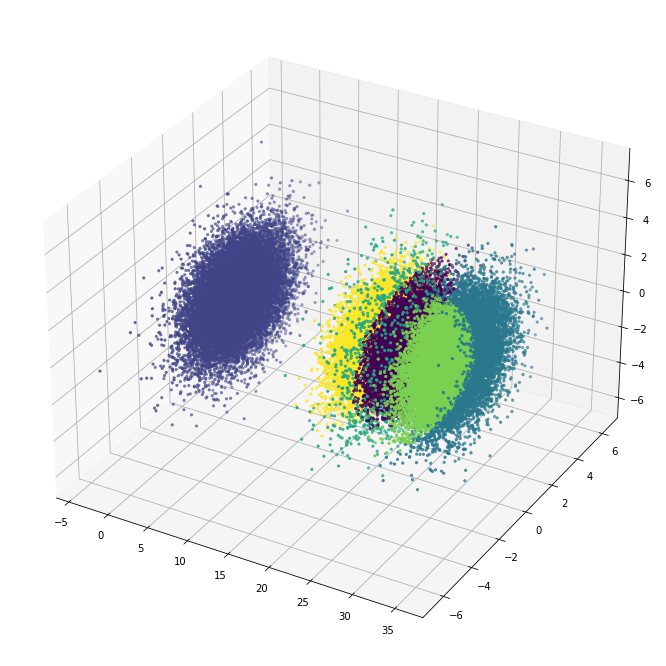

In [8]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=6, random_state=0).fit(Xdata)
bgm_labels=bgm.predict(Xdata)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(vpkx,vpky,vpkz,marker='.', c=bgm_labels)

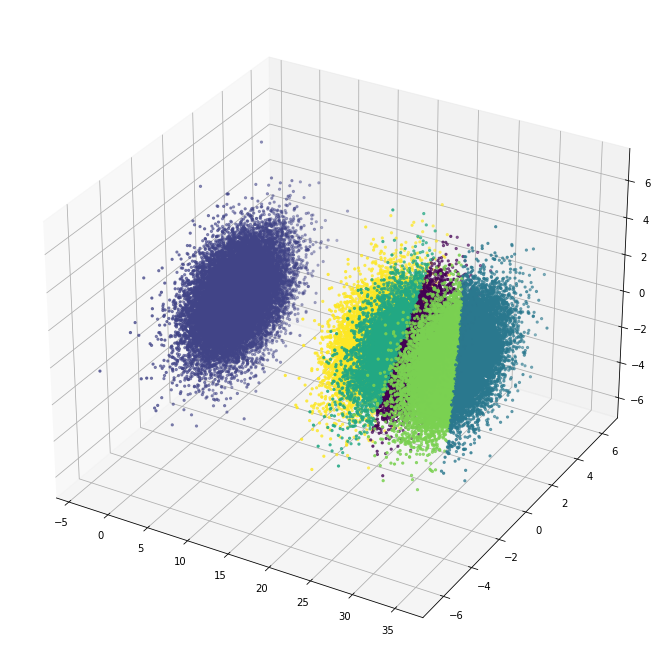

In [11]:
fig.clear()

gmm = GaussianMixture(n_components=6,covariance_type='full', random_state=0).fit(Xdata)


gmm_labels = gmm.predict(Xdata)


fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(vpkx,vpky,vpkz,marker='.', c=gmm_labels)

In [29]:
fig.clear()

lowest_bic = np.infty
bic= []
n_components_range= range(1,15)
cv_types = ["spherical","tied","diag","full"]

for cv_type in cv_types:
    for n_components in n_components_range:
    
        gmm = BayesianGaussianMixture(n_components,covariance_type=cv_type, random_state=0).fit(Xdata)
#         gmm_labels=gmm.predict(fcmdata)
        bic.append(gmm.bic(Xdata))
        if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
bic = np.array(bic)
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
# splot = plt.subplot(2, 1, 2)
# Y_ = clf.predict(fcmdata)
# for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_, color_iter)):
#     v, w = linalg.eigh(cov)
#     if not np.any(Y_ == i):
#         continue
#     plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

#     # Plot an ellipse to show the Gaussian component
#     angle = np.arctan2(w[0][1], w[0][0])
#     angle = 180.0 * angle / np.pi  # convert to degrees
#     v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
#     ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
#     ell.set_clip_box(splot.bbox)
#     ell.set_alpha(0.5)
#     splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title(
    f"Selected GMM: {best_gmm.covariance_type} model, "
    f"{best_gmm.n_components} components"
)
plt.subplots_adjust(hspace=0.35, bottom=0.02)
plt.show()

AttributeError: 'BayesianGaussianMixture' object has no attribute 'bic'